**IMPORT LIBRARY**

In [1]:
from google.colab import files
import pandas as pd
import io
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import seaborn as sn

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

**UPLOAD FILES**

In [3]:
#student portugal
student_por = files.upload()

Saving student-por.csv to student-por.csv


In [4]:
#student math
student_mat = files.upload()

Saving student-mat.csv to student-mat.csv


**FILE TO DATAFRAME**

In [5]:
student_por_df = pd.read_csv(io.BytesIO(student_por['student-por.csv']))

In [ ]:
student_por_df.head(5)

In [6]:
student_mat_df = pd.read_csv(io.BytesIO(student_mat['student-mat.csv']))

In [7]:
student_mat_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**CONVERT CATEROGICAL**

In [8]:
#Check category inside a column
for col in student_por_df.columns:
    print('Unique values in each columns are:', '\n',col,'\n', student_por_df[col].unique(), '\n')

Unique values in each columns are: 
 school 
 ['GP' 'MS'] 

Unique values in each columns are: 
 sex 
 ['F' 'M'] 

Unique values in each columns are: 
 age 
 [18 17 15 16 19 22 20 21] 

Unique values in each columns are: 
 address 
 ['U' 'R'] 

Unique values in each columns are: 
 famsize 
 ['GT3' 'LE3'] 

Unique values in each columns are: 
 Pstatus 
 ['A' 'T'] 

Unique values in each columns are: 
 Medu 
 [4 1 3 2 0] 

Unique values in each columns are: 
 Fedu 
 [4 1 2 3 0] 

Unique values in each columns are: 
 Mjob 
 ['at_home' 'health' 'other' 'services' 'teacher'] 

Unique values in each columns are: 
 Fjob 
 ['teacher' 'other' 'services' 'health' 'at_home'] 

Unique values in each columns are: 
 reason 
 ['course' 'other' 'home' 'reputation'] 

Unique values in each columns are: 
 guardian 
 ['mother' 'father' 'other'] 

Unique values in each columns are: 
 traveltime 
 [2 1 3 4] 

Unique values in each columns are: 
 studytime 
 [2 3 1 4] 

Unique values in each columns are: 
 

In [9]:
#select all caterogical field
col_str = student_por_df.select_dtypes(include='object').columns.tolist()

In [10]:
#one hot encoding

#all string
encode = pd.get_dummies(student_por_df, columns=col_str, 
                      prefix=col_str)

#numeric but categorical --> as needed
encode = pd.get_dummies(encode, columns=['failures', 'famrel', 'freetime', 'goout', 'health', 'Fedu', 'Medu'], prefix = ['failures', 'famrel', 'freetime', 'goout', 'health', 'Fedu', 'Medu'] )

**CHECK CORRELATION**

In [12]:
corrmatrix_por = encode.corr()

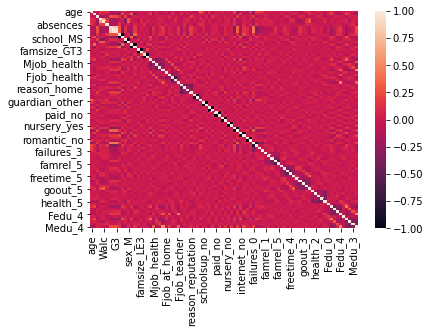

<Figure size 7200x21600 with 0 Axes>

In [13]:
#Correlation Matrix
sn.heatmap(corrmatrix_por, annot=False)
plt.figure(figsize=(100,300))
plt.show()

In [33]:
#Check Correlation for alcohol
dalc_corr = corrmatrix_por.loc['Dalc']
print(dalc_corr.to_string())


age                  0.134768
traveltime           0.092824
studytime           -0.137585
Dalc                 1.000000
Walc                 0.616561
absences             0.172952
G1                  -0.195171
G2                  -0.189480
G3                  -0.204719
school_GP           -0.047169
school_MS            0.047169
sex_F               -0.282696
sex_M                0.282696
address_R            0.047304
address_U           -0.047304
famsize_GT3         -0.060482
famsize_LE3          0.060482
Pstatus_A           -0.041513
Pstatus_T            0.041513
Mjob_at_home        -0.003336
Mjob_health         -0.077160
Mjob_other          -0.019067
Mjob_services        0.056067
Mjob_teacher         0.025662
Fjob_at_home        -0.034544
Fjob_health         -0.004988
Fjob_other          -0.051626
Fjob_services        0.089535
Fjob_teacher        -0.022459
reason_course       -0.050928
reason_home          0.060085
reason_other         0.121225
reason_reputation   -0.091842
guardian_f

In [36]:
#Filter only correlation > 0.09 or < -0.09
dalc_corr_df = dalc_corr.to_frame().reset_index()
dalc_corr_filter = dalc_corr_df.loc[(dalc_corr_df["Dalc"] > 0.09) | ((dalc_corr_df["Dalc"] < -0.09))]
column_variable = dalc_corr_filter['index'].to_list()
column_variable

['age',
 'traveltime',
 'studytime',
 'Dalc',
 'Walc',
 'absences',
 'G1',
 'G2',
 'G3',
 'sex_F',
 'sex_M',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'higher_no',
 'higher_yes',
 'failures_0',
 'failures_1',
 'freetime_3',
 'freetime_4',
 'freetime_5',
 'goout_1',
 'goout_2',
 'goout_5',
 'Medu_2']

In [37]:
#Filter only high correlation field (0.1)
dataset = encode[column_variable]

**CREATE TRAIN DATASET**

In [38]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [39]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Dalc')
test_labels = test_features.pop('Dalc')

In [40]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
age,16.789981,1.236594
traveltime,1.587669,0.755624
studytime,1.938343,0.822027
Dalc,1.520231,0.964162
Walc,2.271676,1.309819
absences,3.618497,4.656639
G1,11.344894,2.817233
G2,11.516378,3.026782
G3,11.843931,3.314400
sex_F,0.622351,0.485267


**NORMALIZATION**

In [41]:
normalizer = preprocessing.Normalization()

In [42]:
normalizer.adapt(np.array(train_features))

**LINEAR MODEL**

In [43]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [44]:
linear_model.predict(train_features[:10])

array([[-1.6475669 ],
       [ 0.4727972 ],
       [ 1.1187673 ],
       [ 2.1472542 ],
       [ 0.10197037],
       [ 0.291761  ],
       [ 1.7051699 ],
       [ 0.21893145],
       [-2.1186528 ],
       [ 0.43153858]], dtype=float32)

In [45]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(25, 1) dtype=float32, numpy=
array([[ 0.4111215 ],
       [ 0.38143647],
       [-0.253228  ],
       [-0.30819917],
       [ 0.31008404],
       [ 0.287789  ],
       [-0.4794995 ],
       [ 0.33634222],
       [ 0.40727514],
       [-0.4519685 ],
       [ 0.07921451],
       [-0.04352203],
       [-0.02979633],
       [-0.36999178],
       [ 0.27184826],
       [ 0.14394283],
       [ 0.01136792],
       [-0.08083376],
       [-0.47745758],
       [-0.35758057],
       [-0.23177661],
       [-0.37173268],
       [-0.43671572],
       [ 0.34136194],
       [-0.09520474]], dtype=float32)>

In [67]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [68]:
#Train the Linear Model
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 3.63 s, sys: 195 ms, total: 3.83 s
Wall time: 5.46 s


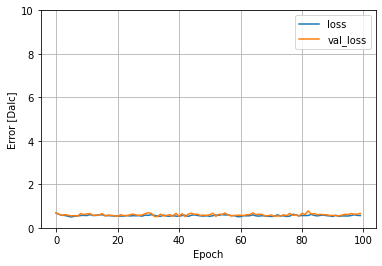

In [69]:
#Loss Plot
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Dalc]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [70]:
#Model Quality

test_results = {}
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index = ['Mean absolute error [Dalc]']).T

{'linear_model': 0.5979821681976318}

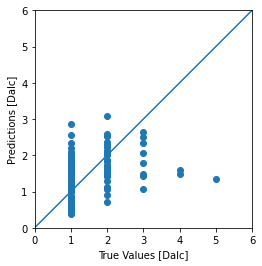

In [71]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Dalc]')
plt.ylabel('Predictions [Dalc]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**DNN MODEL**

In [72]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [73]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 25)                51        
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 5,940
Trainable params: 5,889
Non-trainable params: 51
_________________________________________________________________


In [74]:
#Train the DNN Model
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.64 s, sys: 295 ms, total: 4.93 s
Wall time: 4.67 s


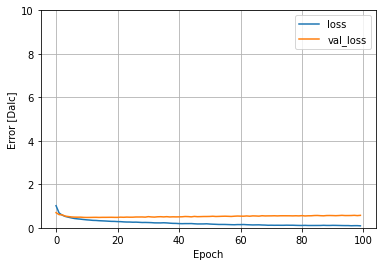

In [75]:
plot_loss(history)

In [79]:
#Model Quality

test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index = ['Mean absolute error [Dalc]']).T

,Mean absolute error [Dalc]
dnn_model,0.536798


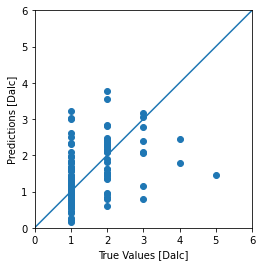

In [78]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Dalc]')
plt.ylabel('Predictions [Dalc]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)